In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
%matplotlib inline

In [78]:
data = pd.read_csv('~/Documents/BigData/openclassrooms/pythons/algorithmes non supervisés/decathlon.txt', sep='\t')

In [79]:
data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [80]:
my_data = data.drop(['Rank', 'Points', 'Competition'], axis=1)   #axe des colonnes

In [81]:
my_data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4


In [82]:
X = my_data.values #pour transformer en un array numpy
print(X.shape)

(41, 10)


In [83]:
from sklearn import preprocessing #pour standardiser les valeurs, c'est compliqué de comparer des temps et des longueurs


In [84]:
std_scale = preprocessing.StandardScaler().fit(X)

In [85]:
X_scaled = std_scale.transform(X)

In [86]:
from sklearn import decomposition #pour faire l'ACP

In [87]:
pca = decomposition.PCA(n_components = 2)

In [88]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [89]:
print(pca.explained_variance_ratio_)

[ 0.32719055  0.1737131 ]


In [90]:
print (pca.explained_variance_ratio_.cumsum())

[ 0.32719055  0.50090366]


In [91]:
X_projected = pca.transform(X_scaled)
print (X_projected.shape)

(41, 2)


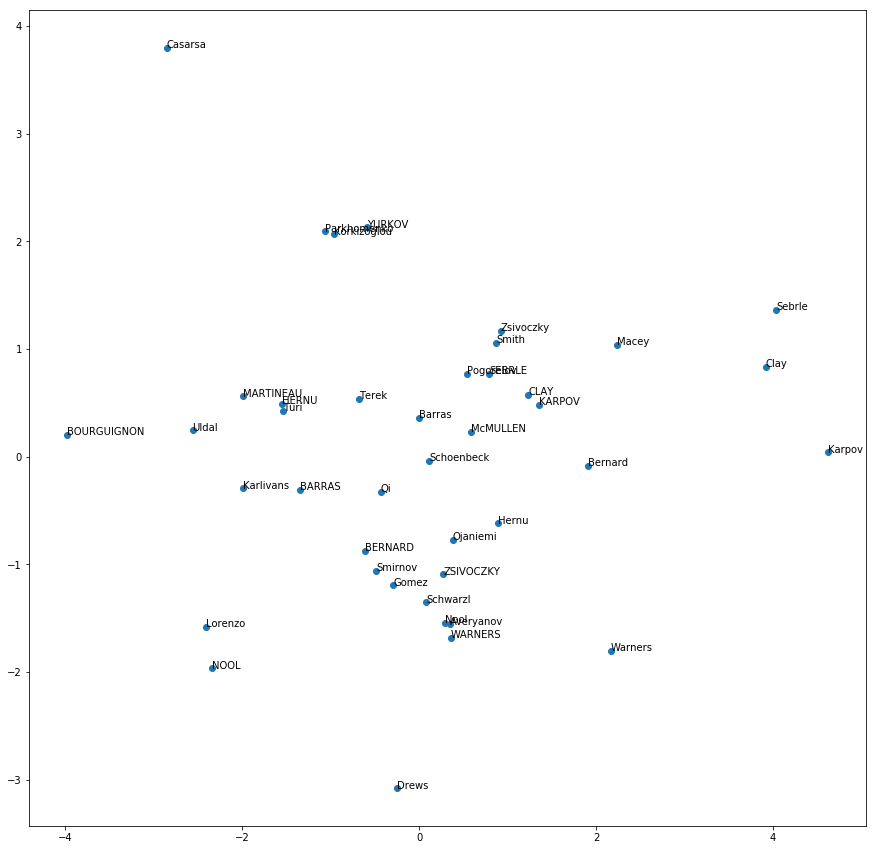

In [98]:
fig = plt.figure(figsize =(15,15))
plt.scatter(X_projected[:,0], X_projected[:,1])

for i, (x,y) in enumerate(zip(X_projected[:,0],
                       X_projected[:,1] )):
    plt.text(x, y, data.index[i])
plt.show()

In [99]:
pcs = pca.components_

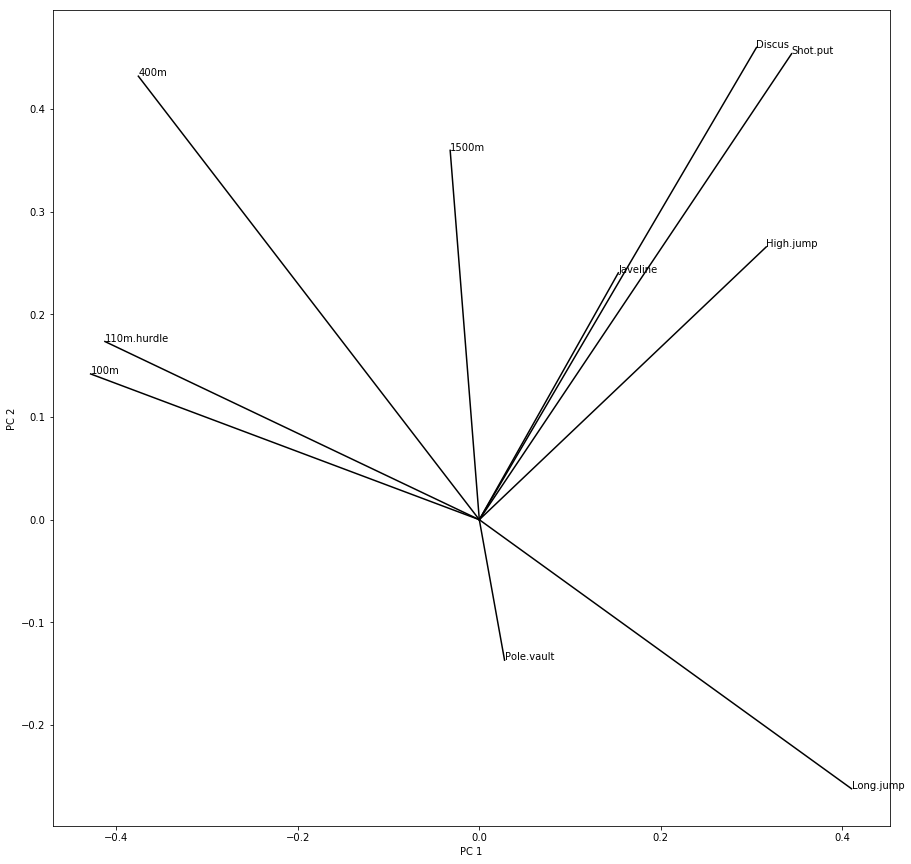

In [102]:
fig = plt.figure(figsize =(15,15))

for i, (x,y) in enumerate(zip(pcs[0,:],
                       pcs[1,:] )):
    plt.plot([0,x],[0,y], color = 'k')
    plt.text(x, y, data.columns[i])
plt.xlabel('PC 1')
plt.ylabel('PC 2')        #discus et shot.put varient dans le meme sens, tout comme 110m hurdle et 100m
plt.show()

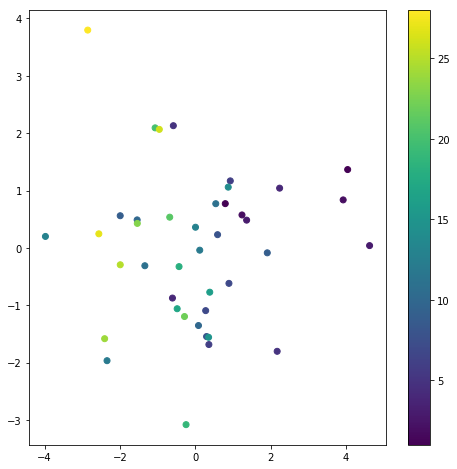

In [104]:
fig = plt.figure(figsize =(8,8))
plt.scatter(X_projected[:,0], X_projected[:,1],c = data.get('Rank'))
plt.colorbar()


plt.show()